# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = stopwords.words('english')

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Preprocess the data
def preprocess_data(texts):
    # Tokenize and clean-up text
    def sent_to_words(sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

    data_words = list(sent_to_words(texts))

    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    # Remove stopwords, make bigrams and lemmatize
    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

    def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]

    def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]

    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """https://spacy.io/api/annotation"""
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent))
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out

    # Remove Stop Words
    data_words_nostops = remove_stopwords(data_words)

    # Form Bigrams
    data_words_bigrams = make_bigrams(data_words_nostops)

    # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

    # Do lemmatization keeping only noun, adj, vb, adv
    data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    return data_lemmatized

# Example text data
texts = ["This is a sample document for topic modeling.",
         "Another document with different words.",
         "More text data to analyze and find topics."]

# Preprocess the data
data_words = preprocess_data(texts)

# Create Dictionary and Corpus
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

# Find the optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Run the function to find the optimal number of topics
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=2, limit=40, step=6)

# Select the model with the highest coherence score
optimal_model = model_list[coherence_values.index(max(coherence_values))]

# Print the topics
topics = optimal_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(0, '0.214*"document" + 0.214*"sample" + 0.214*"model" + 0.214*"topic" + 0.024*"word" + 0.024*"datum" + 0.024*"different" + 0.024*"find" + 0.024*"analyze" + 0.024*"text"')
(1, '0.100*"document" + 0.100*"topic" + 0.100*"datum" + 0.100*"different" + 0.100*"word" + 0.100*"sample" + 0.100*"model" + 0.100*"text" + 0.100*"find" + 0.100*"analyze"')
(2, '0.100*"document" + 0.100*"word" + 0.100*"topic" + 0.100*"datum" + 0.100*"different" + 0.100*"sample" + 0.100*"model" + 0.100*"find" + 0.100*"text" + 0.100*"analyze"')
(3, '0.100*"document" + 0.100*"topic" + 0.100*"word" + 0.100*"datum" + 0.100*"different" + 0.100*"model" + 0.100*"sample" + 0.100*"analyze" + 0.100*"text" + 0.100*"find"')
(4, '0.180*"text" + 0.180*"topic" + 0.180*"analyze" + 0.180*"find" + 0.180*"datum" + 0.020*"document" + 0.020*"different" + 0.020*"word" + 0.020*"model" + 0.020*"sample"')
(5, '0.265*"different" + 0.265*"word" + 0.265*"document" + 0.029*"datum" + 0.029*"topic" + 0.029*"model" + 0.029*"sample" + 0.029*"find" + 0

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
import nltk
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

# Ensure you have the necessary NLTK resources
nltk.download('stopwords')

# Sample text data
documents = [
    "Discover content by tools and technology",
    "Discover content by data science topics",
    # Add more documents as needed
]

# Preprocessing
stop_words = list(stopwords.words('english'))  # Convert to list
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(documents)

# Apply LSA
coherence_scores = []
for k in range(1, min(10, len(documents))):  # Limit K to the number of documents
    svd_model = TruncatedSVD(n_components=k)
    lsa_topic_matrix = svd_model.fit_transform(X)

    # Calculate coherence score
    # Convert LSA matrix back to words for coherence calculation
    terms = vectorizer.get_feature_names_out()
    topic_words = []
    for i in range(k):
        topic_terms = svd_model.components_[i]
        top_terms_indices = topic_terms.argsort()[-10:][::-1]
        topic_words.append([terms[index] for index in top_terms_indices])

    # Create a dictionary for coherence calculation
    dictionary = Dictionary([doc.split() for doc in documents])
    coherence_model = CoherenceModel(topics=topic_words, texts=[doc.split() for doc in documents], dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    coherence_scores.append(coherence)

# Select optimal K
optimal_k = np.argmax(coherence_scores) + 1  # +1 because index starts at 0

# Summarize Topics
terms = vectorizer.get_feature_names_out()
topic_summaries = {}
for i in range(optimal_k):
    topic_terms = svd_model.components_[i]
    top_terms_indices = topic_terms.argsort()[-10:][::-1]
    topic_summaries[i] = [terms[index] for index in top_terms_indices]

print("Optimal number of topics K:", optimal_k)
print("Topic summaries:", topic_summaries)

Optimal number of topics K: 1
Topic summaries: {0: ['content', 'discover', 'tools', 'technology', 'topics', 'science', 'data']}


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [25]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

test_df = pd.read_csv("https://raw.githubusercontent.com/Radhi1999/radhika_INFO5731_Fall2022/main/In_class_exercise/test.csv")

#Cleaning the data
import re

def cleantext(tweets):
    text = re.sub(r'@[A-Za-z0-9_]+', '', tweets) #removes @mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) #removing Hashtag symbols.
    text = re.sub(r'RT[\s]+', '', text) #removing Retweet symbol (RT).
    text = re.sub(r'https?:\/\/\S+', '', text) #remove URL's.
    text = re.sub(r"www.\S+", "", text)
    text = re.sub('[()!?]', ' ', text)
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^A-Za-z0-9]"," ", text)#Filtering non-alphanumeric characters
    text = re.sub('\\n', '', text)#removing the '\n' character
    text = re.sub(r'[0-9]+', '', text)#removing numbers

    return text

test_df["Text"] = test_df["Text"].apply(cleantext)

# Convert to list
data = test_df.Text.values.tolist()

In [26]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts
preprocess_data(data)

[['optimist',
  'abil',
  'prevent',
  'next',
  'pandem',
  'learn',
  'much',
  'covid',
  'innov',
  'tremend'],
 ['global',
  'fund',
  'one',
  'best',
  'invest',
  'global',
  'health',
  'fulli',
  'fund',
  'program',
  'next',
  'year',
  'critic',
  'end',
  'hiv',
  'tb',
  'malaria',
  'help',
  'ensur',
  'covid',
  'last',
  'pandem'],
 ['end',
  'day',
  'paul',
  'last',
  'impact',
  'found',
  'patient',
  'love',
  'dearli',
  'peopl',
  'aliv',
  'today',
  'dedic',
  'life',
  'help'],
 ['work',
  'continu',
  'partner',
  'health',
  'incred',
  'organ',
  'co',
  'found',
  'phenomen',
  'legaci'],
 ['paul',
  'never',
  'happier',
  'care',
  'patient',
  'one',
  'clinic',
  'help',
  'creat',
  'heart',
  'goe',
  'famili',
  'friend',
  'colleagu',
  'peopl',
  'whose',
  'live',
  'touch'],
 ['devast',
  'loss',
  'paul',
  'hero',
  'fortun',
  'call',
  'friend',
  'never',
  'known',
  'anyon',
  'passion',
  'reduc',
  'world',
  'worst',
  'inequ',
  '

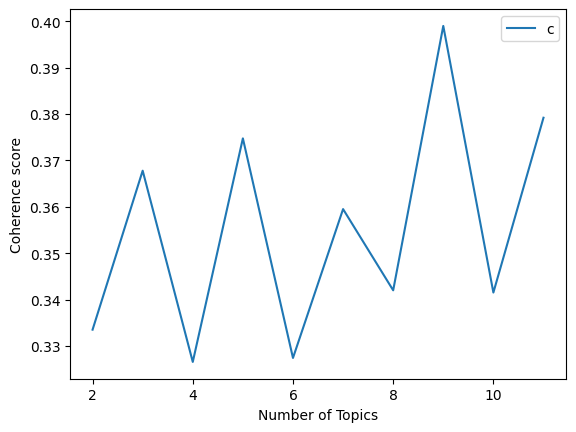

[(0, '0.361*"world" + 0.306*"climat" + 0.235*"work" + 0.221*"chang" + 0.185*"help" + 0.179*"need" + 0.176*"one" + 0.153*"peopl" + 0.152*"year" + 0.143*"make"'), (1, '-0.574*"climat" + -0.376*"chang" + 0.216*"health" + 0.174*"year" + 0.164*"countri" + -0.157*"avoid" + -0.142*"disast" + -0.138*"energi" + -0.129*"need" + 0.127*"vaccin"'), (2, '-0.577*"world" + 0.471*"year" + 0.342*"one" + 0.218*"book" + 0.155*"new" + -0.142*"health" + 0.132*"read" + 0.096*"lot" + -0.093*"around" + 0.091*"learn"'), (3, '-0.528*"world" + 0.244*"countri" + -0.227*"year" + 0.221*"health" + 0.206*"need" + 0.191*"help" + 0.190*"pandem" + 0.189*"vaccin" + -0.150*"one" + 0.148*"covid"'), (4, '0.638*"work" + -0.331*"one" + 0.215*"year" + -0.203*"help" + 0.192*"health" + -0.171*"peopl" + -0.151*"new" + -0.148*"world" + -0.103*"diseas" + -0.101*"book"'), (5, '0.306*"chang" + -0.284*"make" + -0.263*"energi" + -0.261*"new" + 0.243*"one" + 0.229*"climat" + 0.222*"peopl" + 0.174*"countri" + -0.170*"zero" + -0.168*"clean

In [27]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

number_of_topics=7
words=10

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

start,stop,step=2,12,1
plot_graph(preprocess_data(data),start,stop,step)

model=create_gensim_lsa_model(preprocess_data(data),number_of_topics,words)

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [33]:
# Write your code here
%%capture
!pip install bertopic

from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']



In [34]:
from bertopic import BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)



2024-11-02 03:32:28,384 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2024-11-02 04:00:15,140 - BERTopic - Embedding - Completed ✓
2024-11-02 04:00:15,144 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-02 04:00:58,622 - BERTopic - Dimensionality - Completed ✓
2024-11-02 04:00:58,625 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-02 04:01:52,097 - BERTopic - Cluster - Completed ✓
2024-11-02 04:01:52,118 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-02 04:01:57,711 - BERTopic - Representation - Completed ✓


In [ ]:
freq = topic_model.get_topic_info(); freq.head(5)

topic_model.get_topic(0)

In [ ]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

topic_model.update_topics(docs, n_gram_range=(1, 2))
similar_topics, similarity = topic_model.find_topics("vehicle", top_n=5); similar_topics
topic_model.get_topic(71)
# Save model
topic_model.save("my_model")
# Load model
my_model = BERTopic.load("my_model")

In [ ]:
topic_model = BERTopic(embedding_model="xlm-r-bert-base-nli-stsb-mean-tokens")
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device="cpu")
topic_model = BERTopic(embedding_model=sentence_model, verbose=True)

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

query_embedding = model.encode('How big is London')
passage_embedding = model.encode(['London has 9,787,426 inhabitants at the 2011 census',
                                  'London is known for its finacial district'])

print("Similarity:", util.dot_score(query_embedding, passage_embedding))

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
'''Topic coherence is a crucial metric for evaluating the quality of topic models.
Various methods can be used to generate topic models, including lda2vec, BERTopic,
Latent Semantic Analysis (LSA), and Latent Dirichlet Allocation (LDA).

For LDA, the primary inputs are the dictionary and corpus data.
 Gensim assigns a unique id to each word in the document.
 Along with the corpus and dictionary, the number of topics must also be specified.
 Using the LDA visualization tool pyLDAvis, we can compare the results of different topic models.

One of the main techniques for determining the number of topics is topic coherence.
By creating multiple LDA models with different values of \( k \) (number of topics),
we can select the model with the highest coherence score. Typically,
choosing a \( k \) that marks the end of a rapid increase in topic coherence results in meaningful
and interpretable topics. The relationship between coherence value and topic count shows that
the coherence score decreases as more topics are added. The optimal number of topics for LDA is 10,
 with a coherence value of 0.59.

LSA is often used for noise reduction or dimensionality reduction.
The best way to determine \( k \) in topic modeling is by using the topic coherence measure.
A good topic model will have a high coherence score. For LSA, the optimal coherence score is 0.43 with 6 topics.

Based on the analysis, LDA provides better results compared to LSA.'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Working with text data and extracting features using various topic modeling algorithms
has been an enriching experience.
It provided a comprehensive understanding of methods like LDA, LSA, lda2vec, and BERTopic.
Implementing these algorithms helped grasp the nuances of feature extraction from text data,
such as the importance of preprocessing steps and the role of coherence scores in evaluating model quality.
One of the main challenges was ensuring the correct implementation of each algorithm,
especially with different libraries and their specific requirements.
Debugging errors related to data preprocessing and model parameters also required careful attention.
This exercise is highly relevant to the field of Natural Language Processing (NLP),
as topic modeling is fundamental for discovering hidden themes in large text corpora.
Understanding and implementing these algorithms is crucial for tasks such as document classification,
information retrieval, and text summarization, making this exercise directly applicable to ongoing research
and practical projects in NLP.




'''